In [2]:
import pickle
import yaml
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

from pysimulators.interfaces.healpy import HealpixConvolutionGaussianOperator
from pyoperators import MPI         # serve per fare calcolo parallelo

from qubic.lib.MapMaking.FrequencyMapMaking.Qfmm import PipelineFrequencyMapMaking
from qubic.lib.Qsamplings import gal2equ


## Coordinates conversion

In [3]:
far_left = gal2equ(155.41,-27.88)
center_left = gal2equ(80.83, -10.52)
center_right = gal2equ(-34.67,-8.02)
far_right = gal2equ(-160.9, -19.62)

center_right

(array(245.00104989), array(-61.45195729))

## Center right

In [5]:
data = pickle.load(open("/home/mattia/qubic/qubic/scripts/MapMaking/src/FMM/center_left/maps/sky_noise_None.pkl", "rb"))

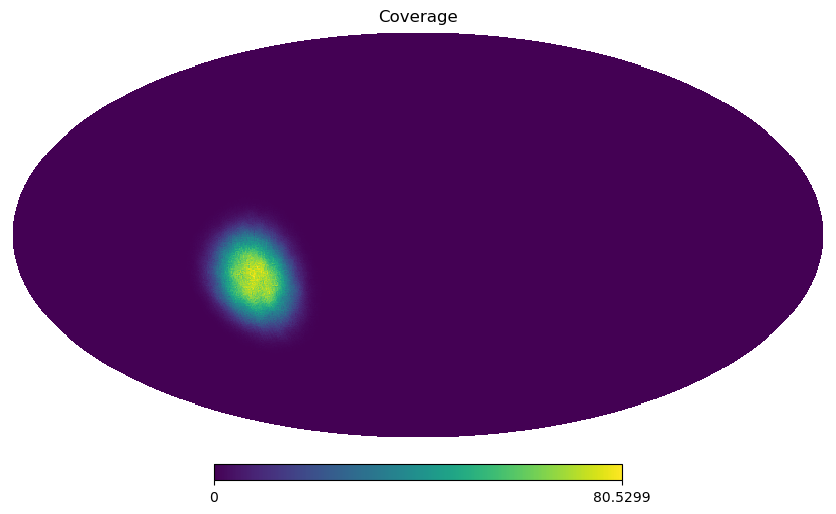

In [6]:
coverage = data['coverage']
hp.mollview(coverage, title='Coverage')

In [7]:
fwhm_in = data["fwhm_in"]
fwhm_out = data["fwhm_out"]
fwhm_rec = data["fwhm_rec"]

nus = data["nus"]
Nrec = nus.shape[0] - 7

maps_input_sky_noise = data["maps_in"]
maps_rec_sky_noise = data["maps"][:Nrec] #np.array([C[i](data["components_i"][i]) for i in range(len(C))])
maps_res_sky_noise = maps_input_sky_noise - maps_rec_sky_noise
center = data["center"]
seenpix = data["seenpix"]
convergence = data["convergence"]

In [9]:
print(Nrec)
print(nus.shape)
print(maps_input_sky_noise.shape)

2
(9,)
(2, 196608, 3)


In [10]:
print("FWHM in: ", fwhm_in)
print("mean fwhm in: ", np.mean(fwhm_in))
print("FWHM out: ", fwhm_out)
print("FWHM rec: ", fwhm_rec)

FWHM in:  [0.00770965 0.00747123 0.00724017 0.00701626 0.00679928 0.006589
 0.00638523 0.00618776]
mean fwhm in:  0.0069248230136742155
FWHM out:  [0. 0. 0. 0. 0. 0. 0. 0.]
FWHM rec:  [0.0073317  0.00646802 0.0093666  0.00785398 0.00383972 0.00279253
 0.0020944  0.00142535 0.00142535]


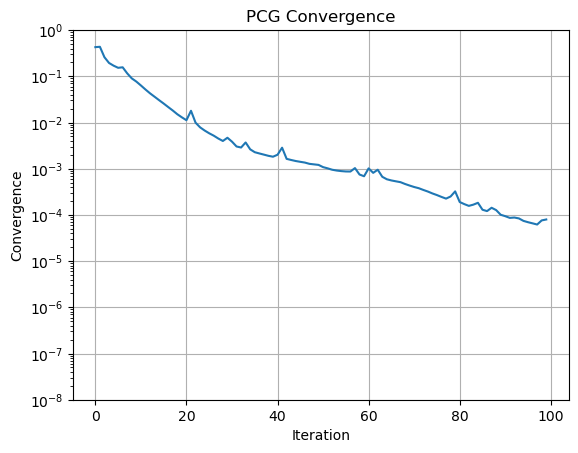

In [11]:
plt.plot(convergence)
plt.xlabel("Iteration")
plt.ylabel("Convergence")
plt.title("PCG Convergence")
plt.yscale("log")
plt.ylim(1e-8, 1e0)
plt.grid()
plt.show()

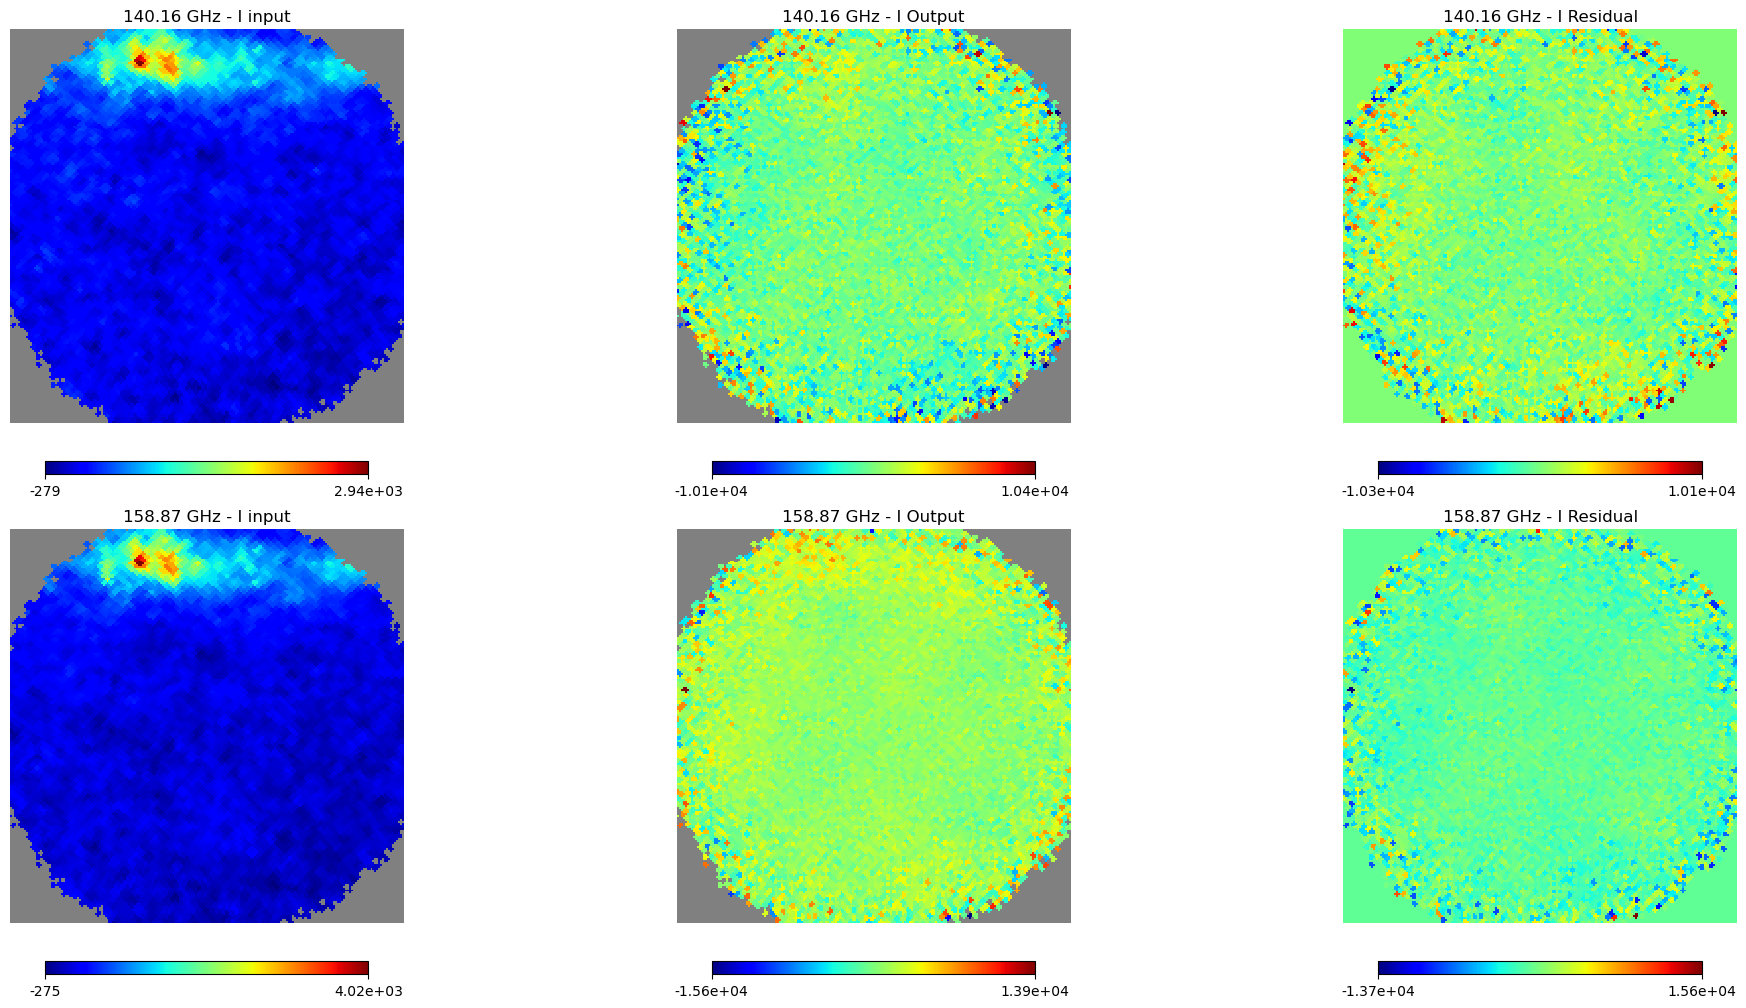

In [12]:
STOKES = ["I", "Q", "U"]

# maps_input[:, ~seenpix, :] = hp.UNSEEN
# maps_rec[:, ~seenpix, :] = hp.UNSEEN
# maps_res[:, ~seenpix, :] = hp.UNSEEN

istk = 0
n = 2
# sigma_input = np.std(maps_input[:, seenpix, istk], axis=0)
# sigma_rec = np.std(maps_rec[:, seenpix, istk], axis=0)
# sigma_res = np.std(maps_rec[:, seenpix, istk] - maps_input[:, seenpix, istk], axis=0)

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview((maps_input_sky_noise[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} input",  
                        cmap="jet",
                        # min = - n * sigma_input[inu],
                        # max = n * sigma_input[inu],
                        sub=(Nrec, 3, k + 1))
    
    hp.gnomview((maps_rec_sky_noise[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="jet",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    
    hp.gnomview(maps_res_sky_noise[inu, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Residual",
                        cmap="jet",
                        # min = - n * sigma_res[inu],
                        # max = n * sigma_res[inu],
                        sub=(Nrec, 3, k + 3))
    k += 3

### Only sky

In [3]:
data = pickle.load(open("/home/mattia/qubic/qubic/scripts/MapMaking/src/FMM/center_right/maps/sky_None.pkl", "rb"))

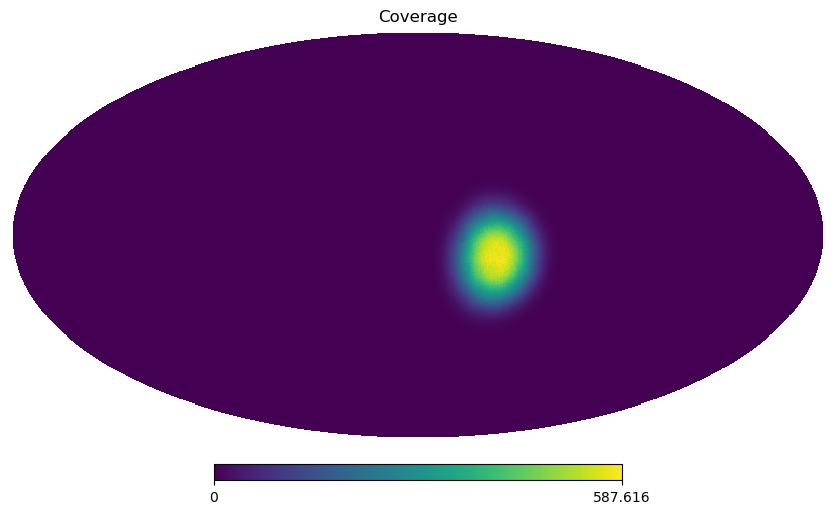

In [4]:
coverage = data['coverage']
hp.mollview(coverage, title='Coverage')

In [5]:
fwhm_in = data["fwhm_in"]
fwhm_out = data["fwhm_out"]
fwhm_rec = data["fwhm_rec"]

nus = data["nus"]
Nrec = nus.shape[0] - 7

maps_input_sky = data["maps_in"]
maps_rec_sky = data["maps"][:Nrec] #np.array([C[i](data["components_i"][i]) for i in range(len(C))])
maps_res_sky = maps_input_sky - maps_rec_sky
center = data["center"]
seenpix = data["seenpix"]
convergence = data["convergence"]

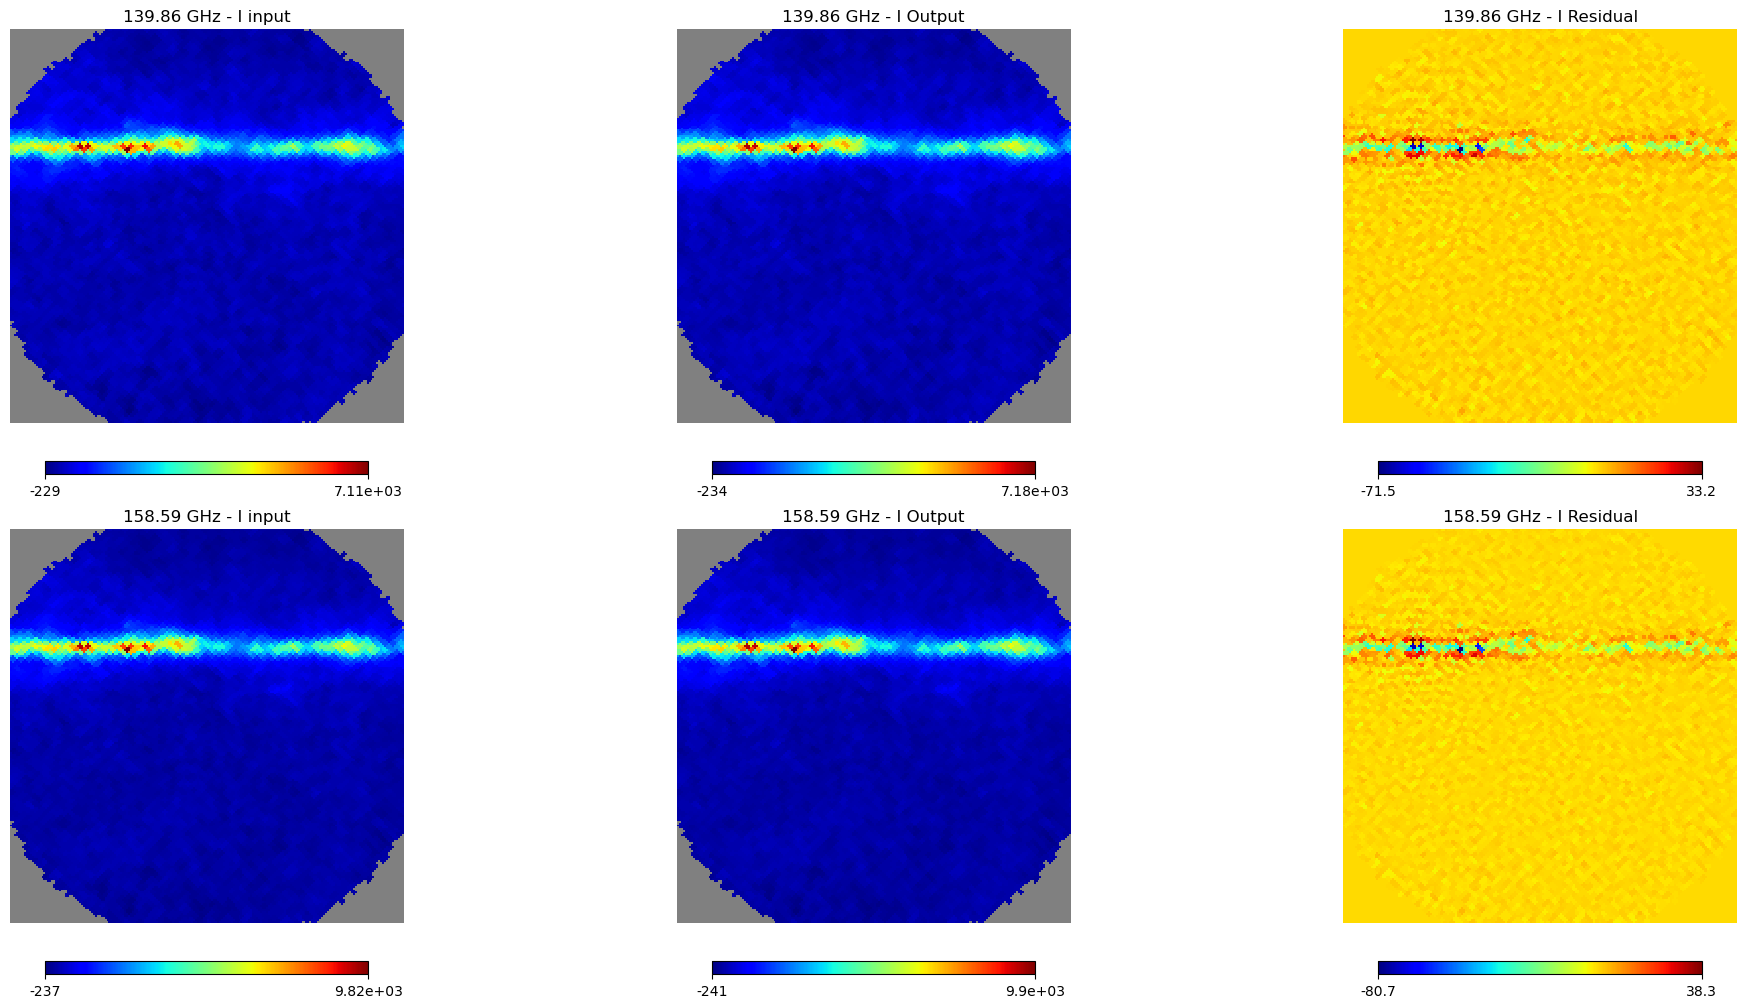

In [6]:
STOKES = ["I", "Q", "U"]

# maps_input[:, ~seenpix, :] = hp.UNSEEN
# maps_rec[:, ~seenpix, :] = hp.UNSEEN
# maps_res[:, ~seenpix, :] = hp.UNSEEN

istk = 0
n = 2
# sigma_input = np.std(maps_input[:, seenpix, istk], axis=0)
# sigma_rec = np.std(maps_rec[:, seenpix, istk], axis=0)
# sigma_res = np.std(maps_rec[:, seenpix, istk] - maps_input[:, seenpix, istk], axis=0)

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview((maps_input_sky[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} input",  
                        cmap="jet",
                        # min = - n * sigma_input[inu],
                        # max = n * sigma_input[inu],
                        sub=(Nrec, 3, k + 1))
    
    hp.gnomview((maps_rec_sky[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="jet",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    
    hp.gnomview(maps_res_sky[inu, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Residual",
                        cmap="jet",
                        # min = - n * sigma_res[inu],
                        # max = n * sigma_res[inu],
                        sub=(Nrec, 3, k + 3))
    k += 3

### Only noise

In [16]:
data = pickle.load(open("/home/mattia/qubic/qubic/scripts/MapMaking/src/FMM/center_right/maps/noise3_None.pkl", "rb"))

In [17]:
fwhm_in = data["fwhm_in"]
fwhm_out = data["fwhm_out"]
fwhm_rec = data["fwhm_rec"]

nus = data["nus"]
Nrec = nus.shape[0] - 7

maps_input_noise = data["maps_in"]
maps_rec_noise = data["maps"][:Nrec] #np.array([C[i](data["components_i"][i]) for i in range(len(C))])
maps_res_noise = maps_input_noise - maps_rec_noise
center = data["center"]
seenpix = data["seenpix"]
convergence = data["convergence"]

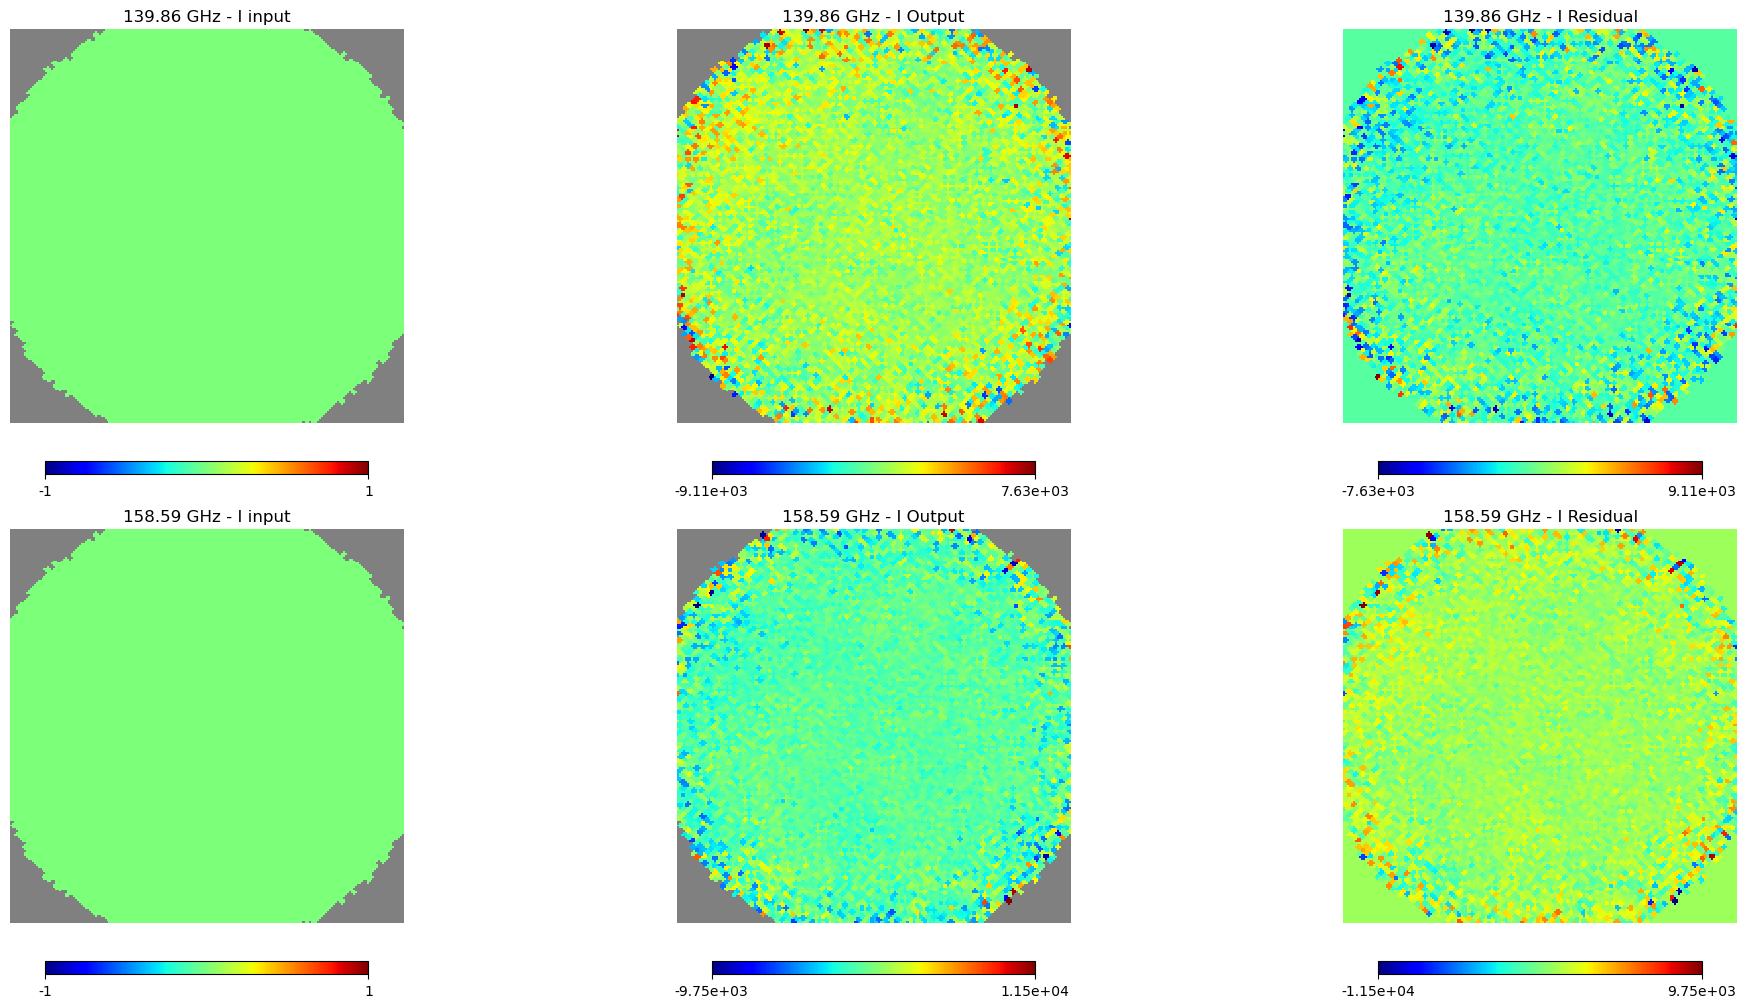

In [18]:
STOKES = ["I", "Q", "U"]

# maps_input[:, ~seenpix, :] = hp.UNSEEN
# maps_rec[:, ~seenpix, :] = hp.UNSEEN
# maps_res[:, ~seenpix, :F   ] = hp.UNSEEN

istk = 0
n = 2
# sigma_input = np.std(maps_input[:, seenpix, istk], axis=0)
# sigma_rec = np.std(maps_rec[:, seenpix, istk], axis=0)
# sigma_res = np.std(maps_rec[:, seenpix, istk] - maps_input[:, seenpix, istk], axis=0)

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview((maps_input_noise[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} input",  
                        cmap="jet",
                        # min = - n * sigma_input[inu],
                        # max = n * sigma_input[inu],
                        sub=(Nrec, 3, k + 1))
    
    hp.gnomview((maps_rec_noise[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="jet",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    
    hp.gnomview(maps_res_noise[inu, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Residual",
                        cmap="jet",
                        # min = - n * sigma_res[inu],
                        # max = n * sigma_res[inu],
                        sub=(Nrec, 3, k + 3))
    k += 3

### Montecarlo Noise

In [8]:
datas = []
for i in range(1,6):
    datas.append(pickle.load(open(f"/home/mattia/qubic/qubic/scripts/MapMaking/src/FMM/center_right/maps/noise{i}_None.pkl", "rb")))

In [9]:
maps_rec_noise = []

for data in datas:
    nus = data["nus"]
    Nrec = nus.shape[0] - 7

    maps_rec_noise.append(data["maps"][:Nrec])

noise_std = np.std(maps_rec_noise, axis=0)

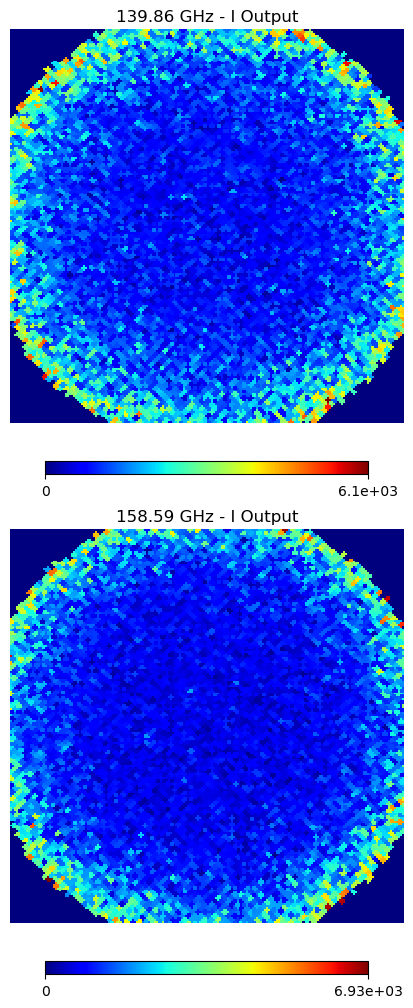

In [10]:
STOKES = ["I", "Q", "U"]

istk = 0
n = 2

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview((noise_std[inu, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="jet",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    k += 3

### Signal-noise ratio

In [14]:
snr = np.abs(maps_rec_sky / noise_std)

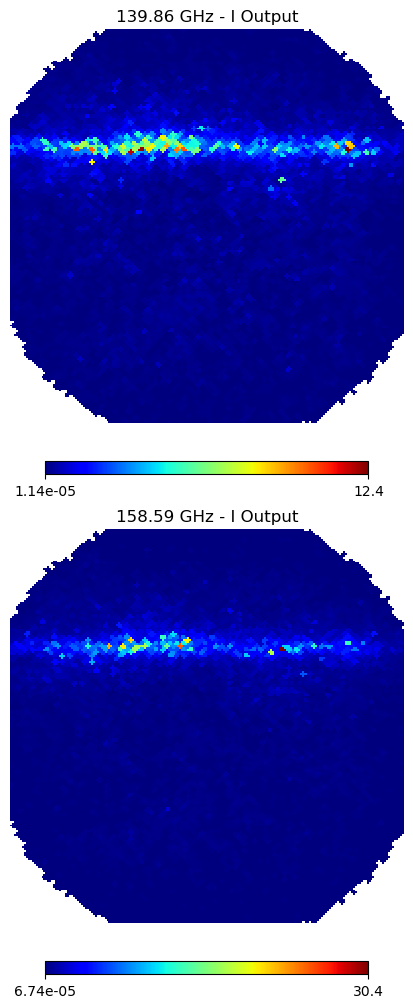

In [23]:
STOKES = ["I", "Q", "U"]

istk = 0
n = 2

reso = 12

k = 0

plt.figure(figsize=(20, 10))
for inu in range(Nrec):
    hp.gnomview(snr[inu, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{nus[inu].round(2)} GHz - {STOKES[istk]} Output",
                        cmap="jet",
                        # min = - n * sigma_rec[inu],
                        # max = n * sigma_rec[inu],
                        sub=(Nrec, 3, k + 2))
    k += 3